# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Akmal Luthfi
- **Email:** akmalluthfi19@gmail.com
- **ID Dicoding:** akmalluthfi

## Menentukan Pertanyaan Bisnis

- Berapa proporsi penyewa yang terdaftar dibandingkan dengan penyewa kasual dalam total penyewaan sepeda?
- Variabel apa saja yang memiliki korelasi tinggi dengan jumlah penyewaan sepeda?
- Berapa jumlah penyewa tertinggi dan terendah dalam sehari?
- Apakah ada perubahan signifikan dalam tren penggunaan sepeda dari waktu ke waktu?
- Bagaimana distribusi penyewaan sepeda? 
    - berdasarkan bulan
    - berdasarkan hari dalam seminggu
    - berdasarkan jam
    - berdasarkan musim
    - berdasarkan kondisi cuaca

## Import Semua Packages/Library yang Digunakan

Import library numpy, pandas, matplotlib dan seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Ubah tema menjadi notebook, dan color palette menjadi pastel

In [2]:
sns.set_theme("notebook")
sns.set_palette("pastel")

## Data Wrangling

### Gathering Data

Read data hour.csv

In [3]:
df = pd.read_csv("data/hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Melihat berapa proporsi untuk penyewa yang casual dan registered

In [4]:
df[["casual", "registered", "cnt"]].sum()

casual         620017
registered    2672662
cnt           3292679
dtype: int64

### Assessing Data

Menampilkan informasi dari dataset, seperti jumlah data, jumlah kolom, detail kolom seperti nama kolom, tipe data, dan informasi jumlah data non-null (tidak kosong)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Menghitung jumlah data yang duplikat

In [6]:
print(f"Jumlah dupliikasi data: {df.duplicated().sum()}")

Jumlah dupliikasi data: 0


Melakukan analisis deskriptif

In [7]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Kolom instant merupakan index dari record, yang kita tidak butuhkan, oleh karena itu akan dihapus

In [8]:
df.drop("instant", axis=1, inplace=True)

Dari informasi dataset diatas, dapat diketahui bahwa tipe data untuk dteday merupakan string, dan akan kita ubah menjadi format datetime

In [9]:
df["dteday"] = pd.to_datetime(df["dteday"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

## Exploratory Data Analysis (EDA)

Menampilkan analisis deskriptif

In [10]:
df.describe()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Melihat korelasi atau hubungan antar variabel

In [11]:
df.corr()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,1.000000,0.404452,0.865648,0.489808,-0.006161,0.014737,0.001372,-0.003366,-0.014063,0.136074,0.137543,0.010196,-0.074645,0.157821,0.281450,0.277753
season,0.404452,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.865648,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489808,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.006161,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014737,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001372,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003366,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014063,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136074,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


Melihat jumlah data penyewa yang casual dan registered, beserta total semua penyewa

In [12]:
df[["casual", "registered", "cnt"]].sum()

casual         620017
registered    2672662
cnt           3292679
dtype: int64

Melihat jumlah penyewa berdasarkan musim

In [13]:
df.groupby("season").agg(
    {
        "casual": "sum",
        "registered": "sum",
        "cnt": "sum",
    }
)

,casual,registered,cnt
season,,,
1,60622,410726,471348
2,203522,715067,918589
3,226091,835038,1061129
4,129782,711831,841613


Melihat jumlah penyewa berdasarkan cuaca

In [14]:
df.groupby("weathersit").agg(
    {
        "casual": "sum",
        "registered": "sum",
        "cnt": "sum",
    }
)

,casual,registered,cnt
weathersit,,,
1,462745,1875428,2338173
2,134481,661471,795952
3,22783,135548,158331
4,8,215,223


Melihat jumlah penyewa berdasarkan bulan untuk tiap tahunnya

In [15]:
df.groupby(["mnth", "yr"]).agg(
    {
        "casual": "sum",
        "registered": "sum",
        "cnt": "sum",
    }
)

casual  registered     cnt
mnth yr                            
1    0     3073       35116   38189
     1     8969       87775   96744
2    0     6242       41973   48215
     1     8721       94416  103137
3    0    12826       51219   64045
     1    31618      133257  164875
4    0    22346       72524   94870
     1    38456      135768  174224
5    0    31050      104771  135821
     1    44235      151630  195865
6    0    30612      112900  143512
     1    43294      159536  202830
7    0    36452      104889  141341
     1    41705      161902  203607
8    0    28842      107849  136691
     1    43197      171306  214503
9    0    26545      100873  127418
     1    43778      174795  218573
10   0    25222       98289  123511
     1    34538      164303  198841
11   0    15594       86573  102167
     1    21009      131655  152664
12   0     8448       78875   87323
     1    13245      110468  123713

Melihat jumlah penyewa berdasarkan hari dalam seminggu

In [16]:
df.groupby("weekday").agg(
    {
        "casual": "sum",
        "registered": "sum",
        "cnt": "sum",
    }
)

,casual,registered,cnt
weekday,,,
0,140521,303506,444027
1,70784,384719,455503
2,57843,411266,469109
3,57319,415729,473048
4,61460,423935,485395
5,78238,409552,487790
6,153852,323955,477807


Melihat jumlah penyewa setiap jam

In [17]:
df.groupby("hr").agg(
    {
        "casual": "sum",
        "registered": "sum",
        "cnt": "sum",
    }
)

,casual,registered,cnt
hr,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428
5,1012,13249,14261
6,3017,52115,55132
7,8037,146134,154171
8,15761,245240,261001


## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa proporsi penyewa yang terdaftar dibandingkan dengan penyewa kasual dalam total penyewaan sepeda?

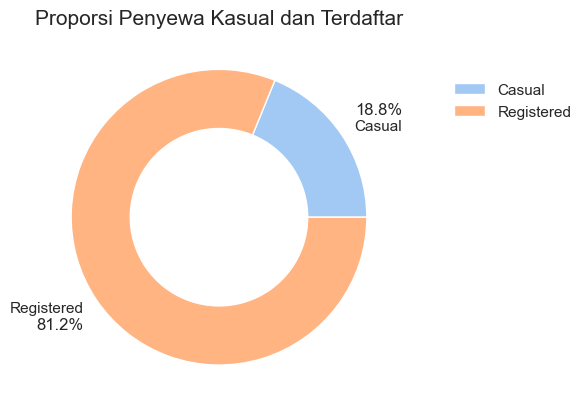

In [18]:
plt.pie(
    df[["casual", "registered"]].sum(),
    autopct="%1.1f%%",
    labels=["Casual", "Registered"],
    wedgeprops={"width": 0.4},
    pctdistance=1.3,
)
plt.title("Proporsi Penyewa Kasual dan Terdaftar", fontsize=15)
plt.legend(["Casual", "Registered"], bbox_to_anchor=(1.1, 0.9), framealpha=0)
plt.show()

### Pertanyaan 2: Variabel apa saja yang memiliki korelasi tinggi dengan jumlah penyewaan sepeda?

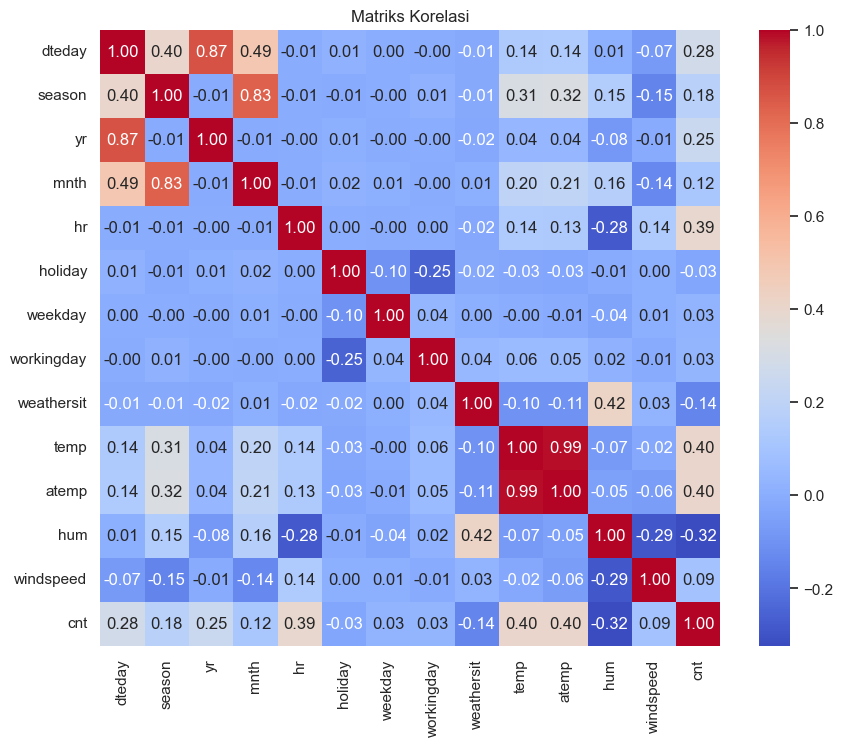

In [19]:
corr_matrix = df.drop(["casual", "registered"], axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

### Pertanyaan 3: Berapa jumlah penyewa tertinggi dan terendah dalam sehari?

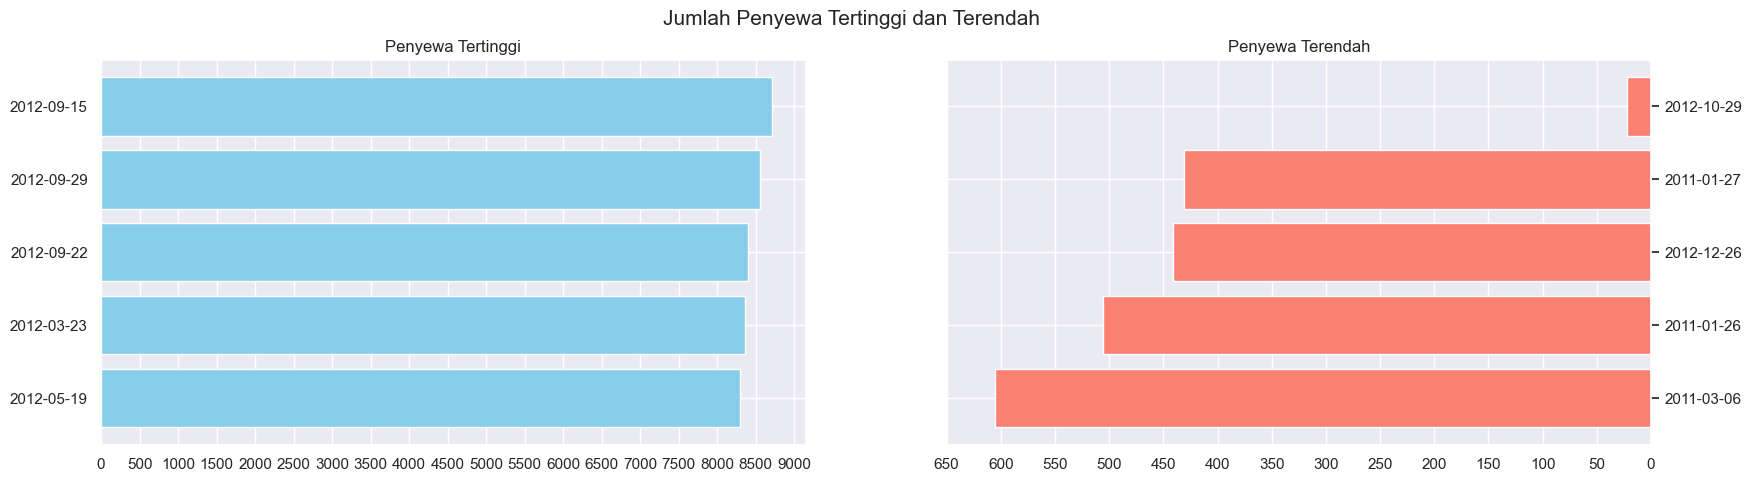

In [20]:
groupby_day_df = df.groupby("dteday")["cnt"].sum().reset_index()
groupby_day_df["dteday"] = groupby_day_df["dteday"].astype(str)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))

ax1.barh(
    y="dteday",
    width="cnt",
    data=groupby_day_df.sort_values(by="cnt", ascending=False).head(),
    color="skyblue",
)
ax1.set_title("Penyewa Tertinggi")
ax1.invert_yaxis()
ax1.set_xticks(range(0, 9500, 500))

ax2.barh(
    y="dteday",
    width="cnt",
    data=groupby_day_df.sort_values(by="cnt").head(),
    color="salmon",
)
ax2.invert_xaxis()
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.set_title("Penyewa Terendah")
ax2.invert_yaxis()
ax2.set_xticks(range(0, 700, 50))

plt.suptitle("Jumlah Penyewa Tertinggi dan Terendah", fontsize=15)
plt.show()

### Pertanyaan 4: Apakah ada perubahan signifikan dalam tren penggunaan sepeda dari waktu ke waktu

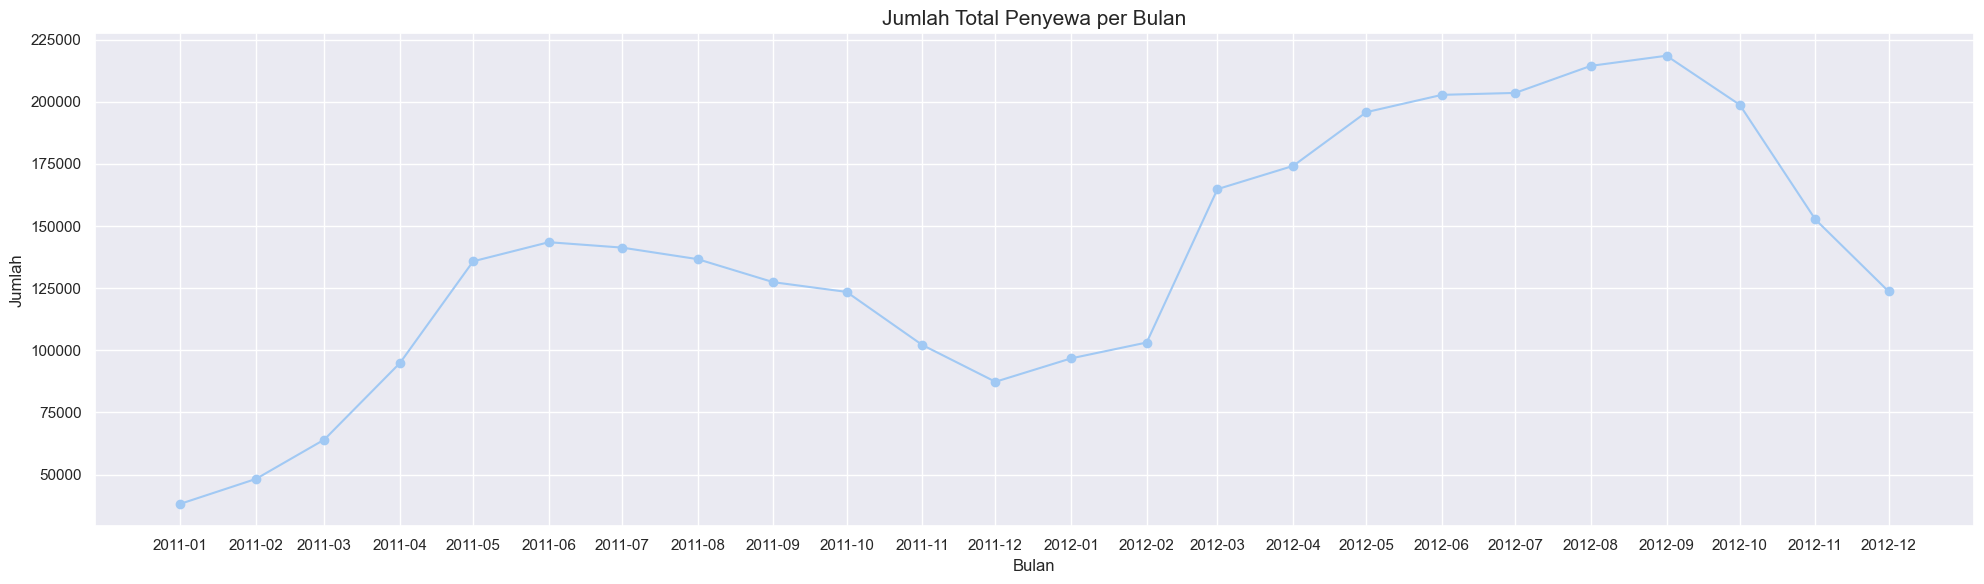

In [21]:
df["month"] = df["dteday"].dt.to_period("M")
monthly_data = df.groupby("month")["cnt"].sum().reset_index()
monthly_data["month"] = monthly_data["month"].dt.to_timestamp()

plt.figure(figsize=(20, 6))
plt.plot(monthly_data["month"], monthly_data["cnt"], marker="o")
plt.title("Jumlah Total Penyewa per Bulan", fontsize=15)
plt.xlabel("Bulan")
plt.ylabel("Jumlah")
plt.grid(True)
plt.xticks(
    monthly_data["month"],
    labels=monthly_data["month"].dt.strftime("%Y-%m"),
)
plt.tight_layout()
plt.show()

### Pertanyaan 5: Bagaimana distribusi penyewaan sepeda? 

#### Berdasarkan Bulan

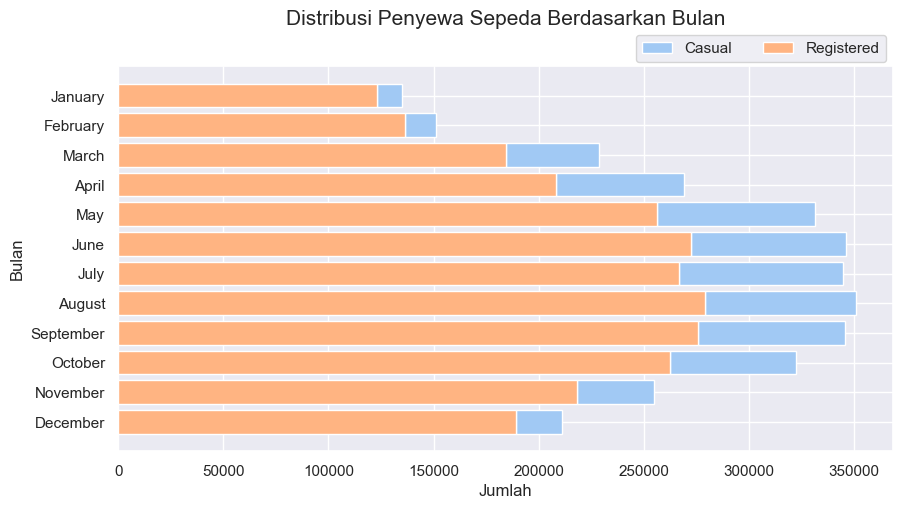

In [22]:
mnth_df = df.groupby("mnth").agg({"casual": "sum", "registered": "sum"})
mnth_df.reset_index(inplace=True)
mnth_df["mnth"] = pd.to_datetime(mnth_df["mnth"], format="%m").dt.strftime("%B")

plt.figure(figsize=(10, 5))
plt.barh(
    mnth_df["mnth"],
    mnth_df["casual"],
    left=mnth_df["registered"],
    label="Casual",
)
plt.barh(mnth_df["mnth"], mnth_df["registered"], label="Registered")

plt.title("Distribusi Penyewa Sepeda Berdasarkan Bulan", fontsize=15, pad=30)
plt.ylabel("Bulan")
plt.xlabel("Jumlah")
plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor=(1, 1.1), ncol=2)
plt.show()

#### Berdasarkan Hari Dalam Seminggu

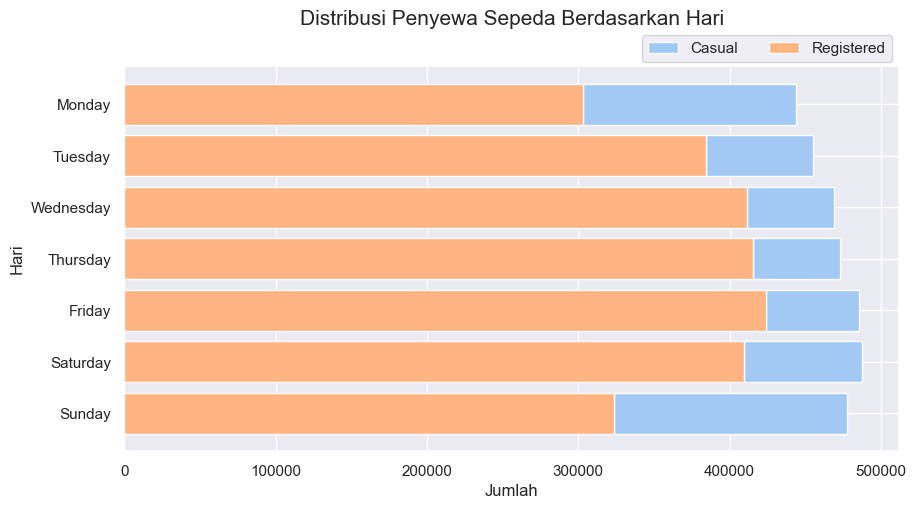

In [23]:
weekday_df = df.groupby("weekday").agg({"casual": "sum", "registered": "sum"})
weekday_df.reset_index(inplace=True)

plt.figure(figsize=(10, 5))
plt.barh(
    weekday_df["weekday"],
    weekday_df["casual"],
    left=weekday_df["registered"],
    label="Casual",
)
plt.barh(weekday_df["weekday"], weekday_df["registered"], label="Registered")

plt.title("Distribusi Penyewa Sepeda Berdasarkan Hari", pad=30, fontsize=15)
plt.ylabel("Hari")
plt.xlabel("Jumlah")
plt.gca().invert_yaxis()
days_ = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.yticks(weekday_df["weekday"], labels=days_)
plt.legend(bbox_to_anchor=(1, 1.1), ncol=2)
plt.show()

#### Berdasarkan Jam

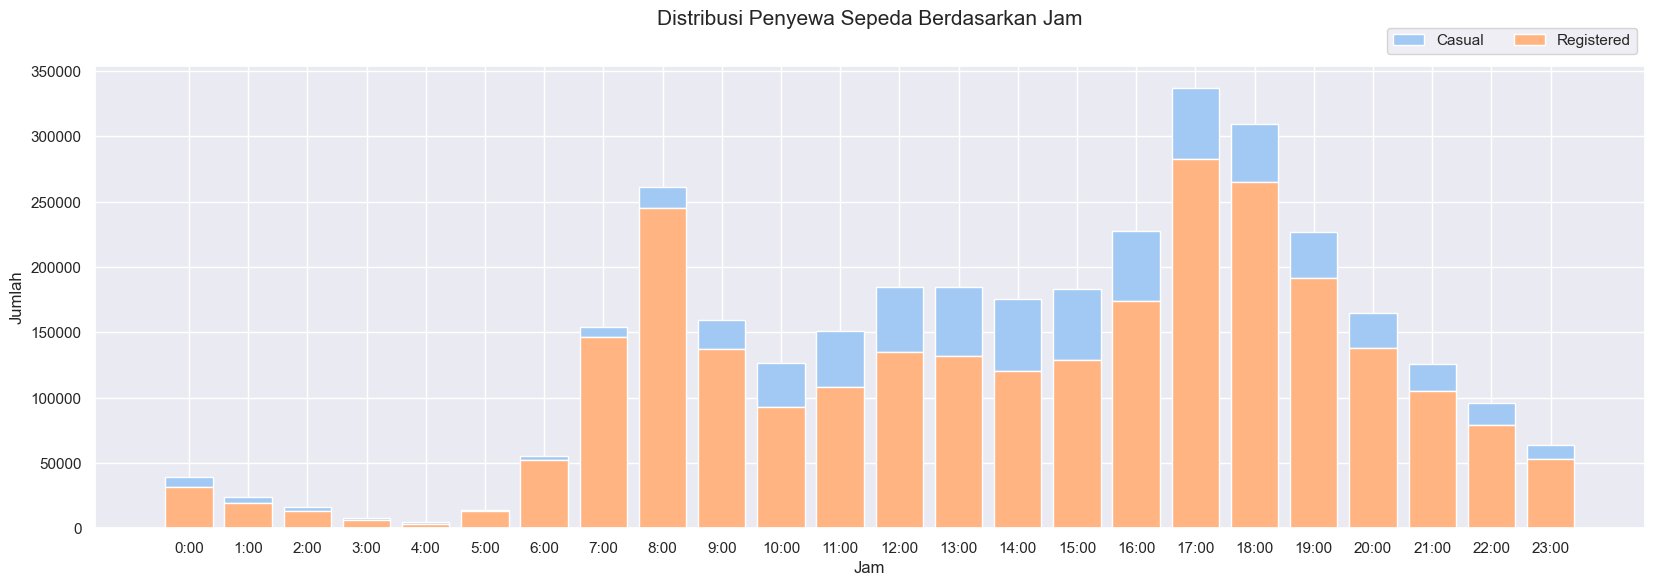

In [24]:
hour_df = df.groupby("hr").agg({"casual": "sum", "registered": "sum"}).reset_index()

plt.figure(figsize=(20, 6))
plt.bar(
    hour_df["hr"],
    hour_df["casual"],
    bottom=hour_df["registered"],
    label="Casual",
)

plt.bar(hour_df["hr"], hour_df["registered"], label="Registered")
plt.title("Distribusi Penyewa Sepeda Berdasarkan Jam", fontsize=15, pad=30)
plt.ylabel("Jumlah")
plt.xlabel("Jam")
plt.xticks(hour_df["hr"], [f"{time}:00" for time in hour_df["hr"]])
plt.legend(bbox_to_anchor=(1, 1.1), ncol=2)
plt.show()

#### Berdasarkan Musim

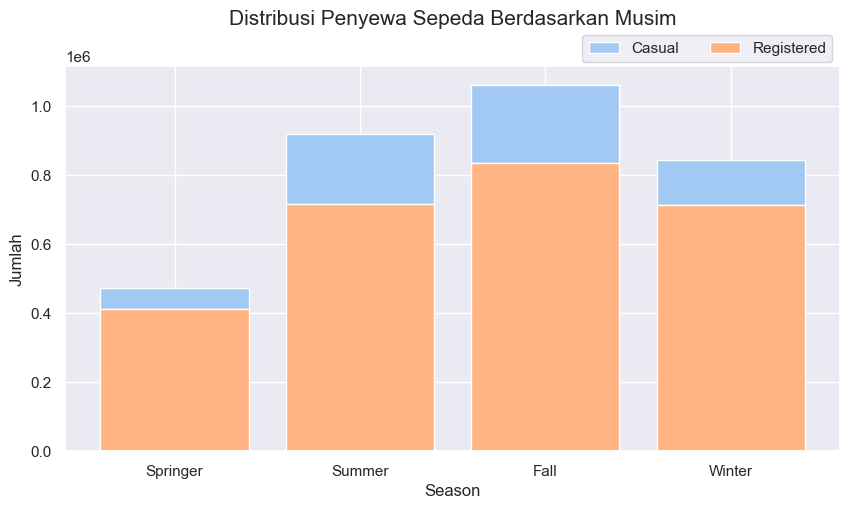

In [25]:
season_df = df.groupby("season").agg({"casual": "sum", "registered": "sum"})
season_df.reset_index(inplace=True)

plt.figure(figsize=(10, 5))
plt.bar(
    season_df["season"],
    season_df["casual"],
    bottom=season_df["registered"],
    label="Casual",
)
plt.bar(season_df["season"], season_df["registered"], label="Registered")

plt.title("Distribusi Penyewa Sepeda Berdasarkan Musim", fontsize=15, pad=30)
plt.ylabel("Jumlah")
plt.xlabel("Season")
plt.xticks(season_df["season"], labels=["Springer", "Summer", "Fall", "Winter"])
plt.legend(bbox_to_anchor=(1, 1.1), ncol=2)
plt.show()

#### Berdasarkan Kondisi Cuaca

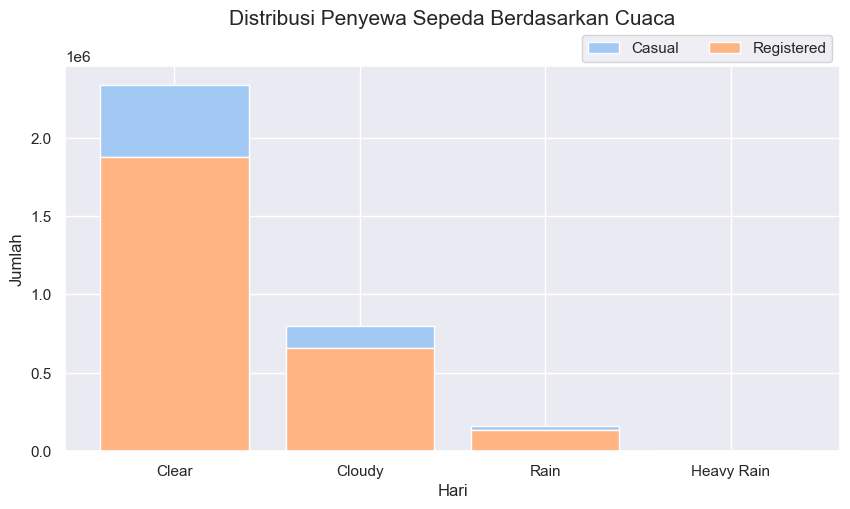

In [26]:
weathersit_df = df.groupby("weathersit").agg({"casual": "sum", "registered": "sum"})
weathersit_df.reset_index(inplace=True)

plt.figure(figsize=(10, 5))
plt.bar(
    weathersit_df["weathersit"],
    weathersit_df["casual"],
    bottom=weathersit_df["registered"],
    label="Casual",
)
plt.bar(weathersit_df["weathersit"], weathersit_df["registered"], label="Registered")

plt.title("Distribusi Penyewa Sepeda Berdasarkan Cuaca", fontsize=15, pad=30)
plt.ylabel("Jumlah")
plt.xlabel("Hari")
plt.xticks(weathersit_df["weathersit"], ["Clear", "Cloudy", "Rain", "Heavy Rain"])
plt.legend(bbox_to_anchor=(1, 1.1), ncol=2)
plt.show()

### Time Series Decomposition

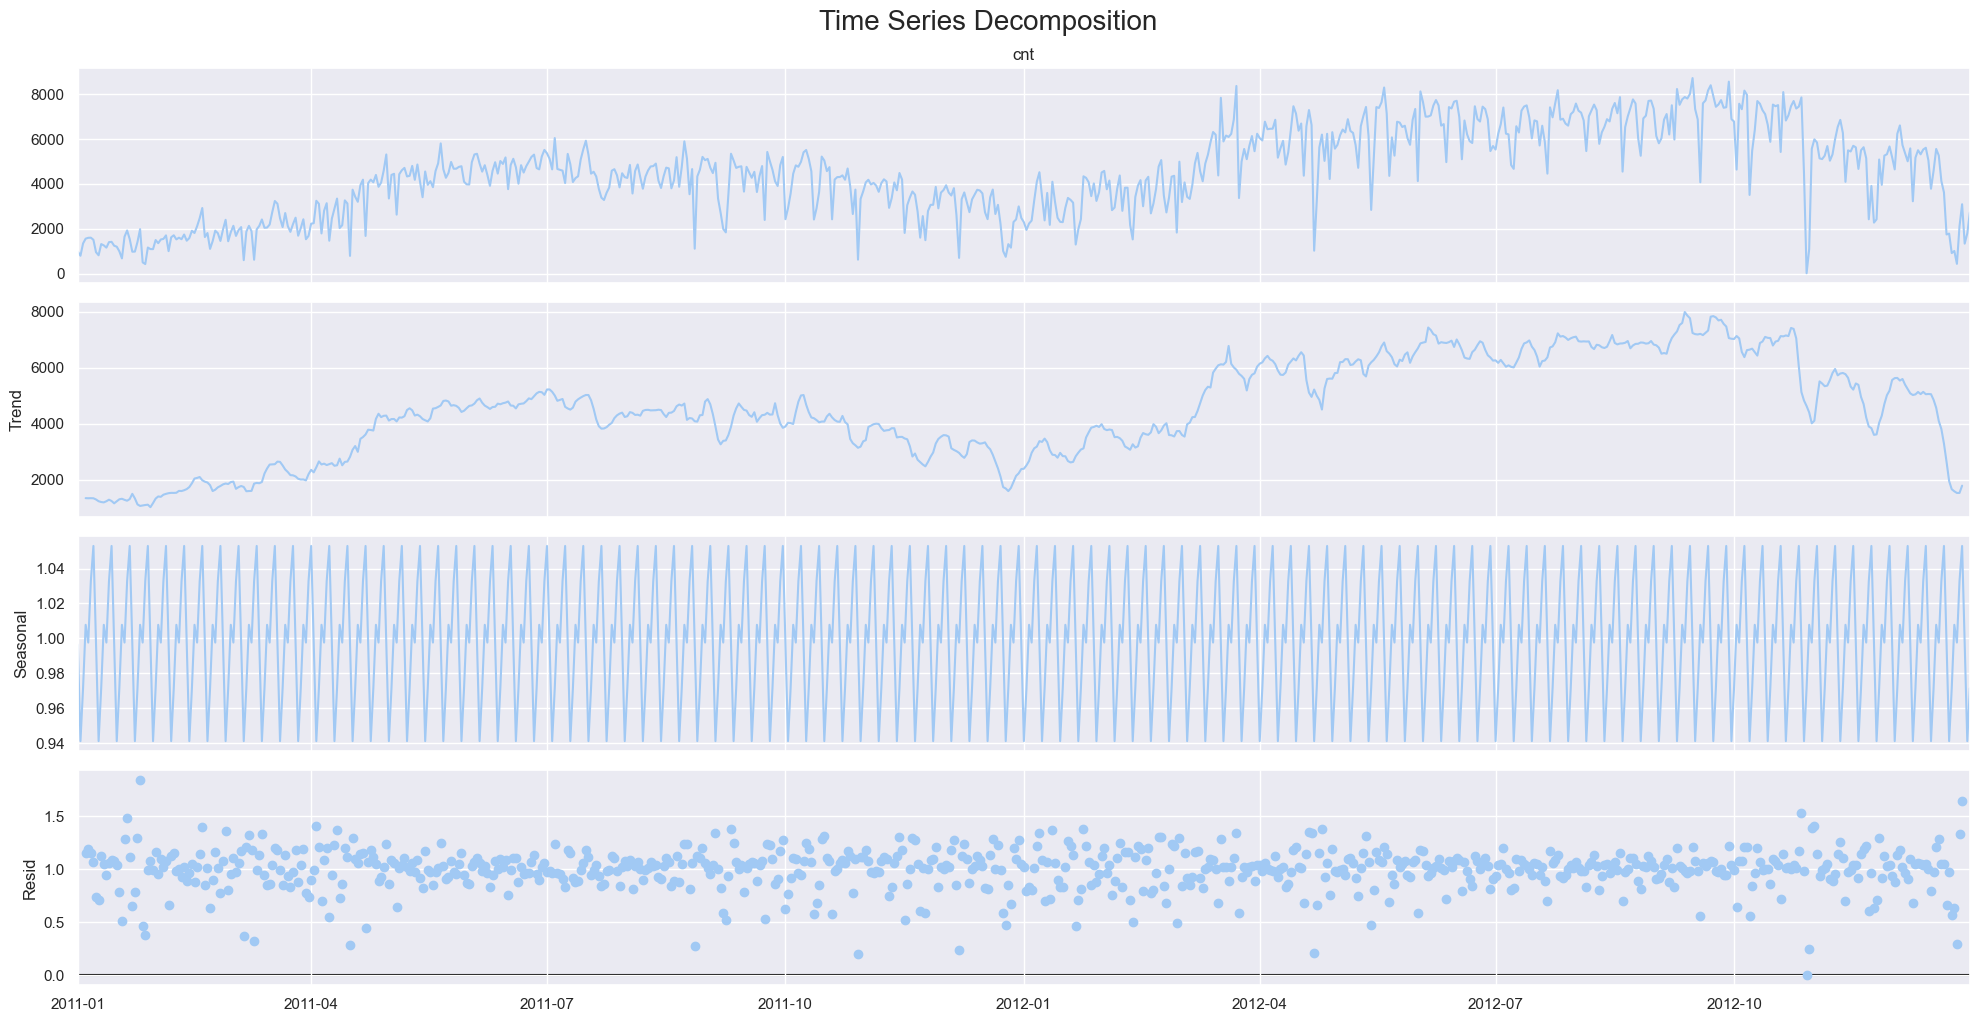

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

time_series_df = df.groupby("dteday")["cnt"].sum().reset_index()
time_series_df = time_series_df.set_index("dteday")

result = seasonal_decompose(time_series_df["cnt"], model="multiplicative")

plt.rcParams.update({"figure.figsize": (20, 10)})
fig = result.plot()
plt.suptitle("Time Series Decomposition", fontsize=20, y=1.02)
plt.show()

## Conclusion

- Berapa proporsi penyewa yang terdaftar dibandingkan dengan penyewa kasual dalam total penyewaan sepeda?
    Dari visualisasi diatas, dapat dilihat bahwa jumlah penyewa yang terdaftar sebanyak 81.2% dibanding dengan penyewa kasual yang hanya 18.8%
- Variabel apa saja yang memiliki korelasi tinggi dengan jumlah penyewaan sepeda?
    Dari matriks korelasi dapat dilihat bahwa jumlah penyewaan sepeda (cnt) mempunyai korelasi positif dengan temp sebesar 0.4 dan yang selanjutnya disusul oleh hr (hour) yaitu sebesar  0.39, Selain itu jumlah penyewaan sepeda (cnt) juga memiliki korelasi negatif dengan kelembapan (hum) sebesar -0.32
- Berapa jumlah penyewa tertinggi dan terendah dalam sehari?
    jumlah penyewa tertinggi terdapat pada tanggal 15-09-2012 sekitar 8700 dan terendah di tanggal 29-10-2012 yaitu sekitar 25
- Bagaimana tren penggunaan sepeda dari waktu ke waktu?
    Dapat dilihat bahwa terdapat kenaikan pada tahun 2011 dari bulan 1 ke bulan 6, setelah itu stabil dan mulai menurun hingga pada bulan 12, tetapi pada tahun 2012 terdadpat kenaikan hingga bulan 9, dan mulai turun hingga akhir tahun, terdapat kenaikan dari tahun 2011 ke 2012
- Bagaimana distribusi penyewaan sepeda? 
    - berdasarkan bulan:
        Terdapat banyak penyewa dari bulan juni hingga september, dan bulan januari dan februari terdapat sedikit penyewa 
    - berdasarkan hari dalam seminggu:
        Tertinggi terdapat pada hari jum'at dan sabtu, sedangkan terendah berada di hari senin dan selsa
    - berdasarkan jam:
        Tertinggi berada pada sekitar jam (08:00) 8 pagi dan jam 17:00 (5 sore), sedangkan terendah pada jam 3 dan 4 pagi
    - berdasarkan musim:
        Secara berurutan dari yg terbanyak dari musim gugur, musim panas, musim dingin, dan terendah yaitu musim semi
    - berdasarkan kondisi cuaca:
        Terbanyak terdapat penyewa ketika kondisi cuaca cerah, dan tersedikit ketika dalam kondisi hujan atau hujan berat